# cenpy-api

Cenpy now has the slickest interface of any census data wrangling package out there. Query for what you want, wherever you want, using the placename that you're interested in:

In [1]:
pip install --pre cenpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from cenpy import products
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Rent Value in Contract

In [5]:
#from_csa means it will extract the map of a Combined Statistical Area.
#List of 172 US CSA: https://en.wikipedia.org/wiki/Combined_statistical_area
#'B19013_001E' Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)

sj_csa= products.ACS(2019).from_csa('San Jose-San Francisco-Oakland',level='tract',
                                        variables=['B19013_001E'])

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:755: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [8]:
sj_csa

,GEOID,geometry,B19013_001E,NAME,state,county,tract
0,06097990100,"POLYGON ((-13762706.610 4687083.180, -13761997...",NaN,"Census Tract 9901, Sonoma County, California",06,097,990100
1,06075980401,"POLYGON ((-13711647.480 4547791.830, -13711635...",NaN,"Census Tract 9804.01, San Francisco County, Ca...",06,075,980401
2,06081612700,"POLYGON ((-13603249.680 4500745.130, -13603146...",250001.0,"Census Tract 6127, San Mateo County, California",06,081,612700
3,06081612000,"POLYGON ((-13598390.690 4504780.430, -13598369...",71234.0,"Census Tract 6120, San Mateo County, California",06,081,612000
4,06081612100,"POLYGON ((-13598117.850 4502972.090, -13598103...",57627.0,"Census Tract 6121, San Mateo County, California",06,081,612100
...,...,...,...,...,...,...,...
1929,06099002701,"POLYGON ((-13465889.440 4526163.430, -13465889...",74063.0,"Census Tract 27.01, Stanislaus County, California",06,099,002701
1930,06099002605,"POLYGON ((-13463858.860 4524354.770, -13463858...",48892.0,"Census Tract 26.05, Stanislaus County, California",06,099,002605
1931,06077004902,"POLYGON ((-13486050.400 4566015.310, -13485973...",63565.0,"Census Tract 49.02, San Joaquin County, Califo...",06,077,004902
1932,06099003909,"POLYGON ((-13456035.220 4512110.920, -13456017...",52671.0,"Census Tract 39.09, Stanislaus County, California",06,099,003909


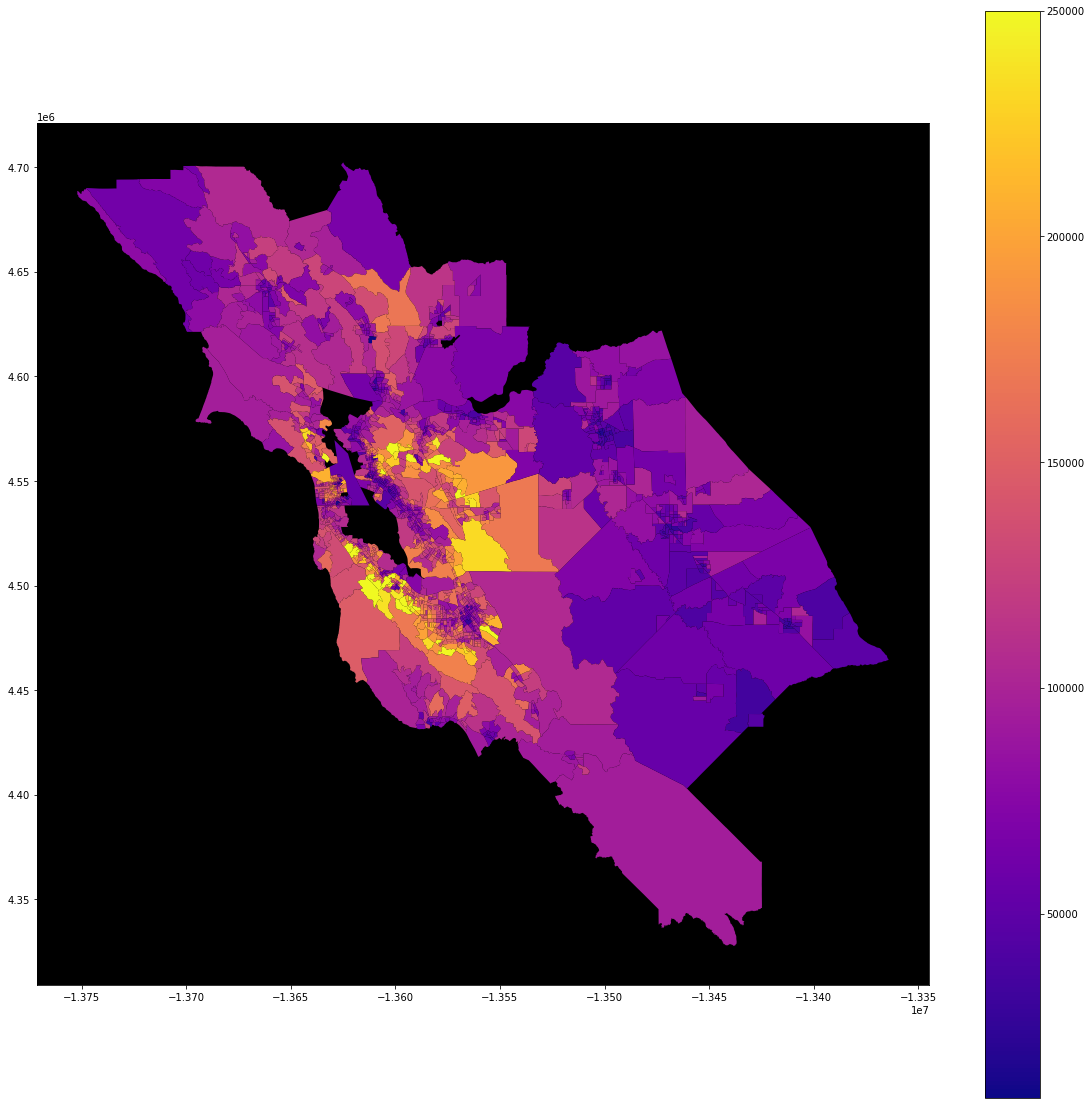

In [7]:
### Note drop removes any rows with missing values in the column named 'B19013_001E'.
## sj_csa is a geopandas a table with geoid and geometry that can be displayed as a map
f, ax = plt.subplots(1,1,figsize=(20,20))
sj_csa.dropna(subset=['B19013_001E'], axis=0).plot('B19013_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

In [11]:
###from_msa means it will extract the map of a  Metropolitan Statistical Area.
## There are 384 metropolitan statistical areas: https://en.wikipedia.org/wiki/Metropolitan_statistical_area
sf_msa = products.ACS(2019).from_msa('San Francisco-Oakland-Berkeley',level='tract',
                                        variables=['B19013_001E'])

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


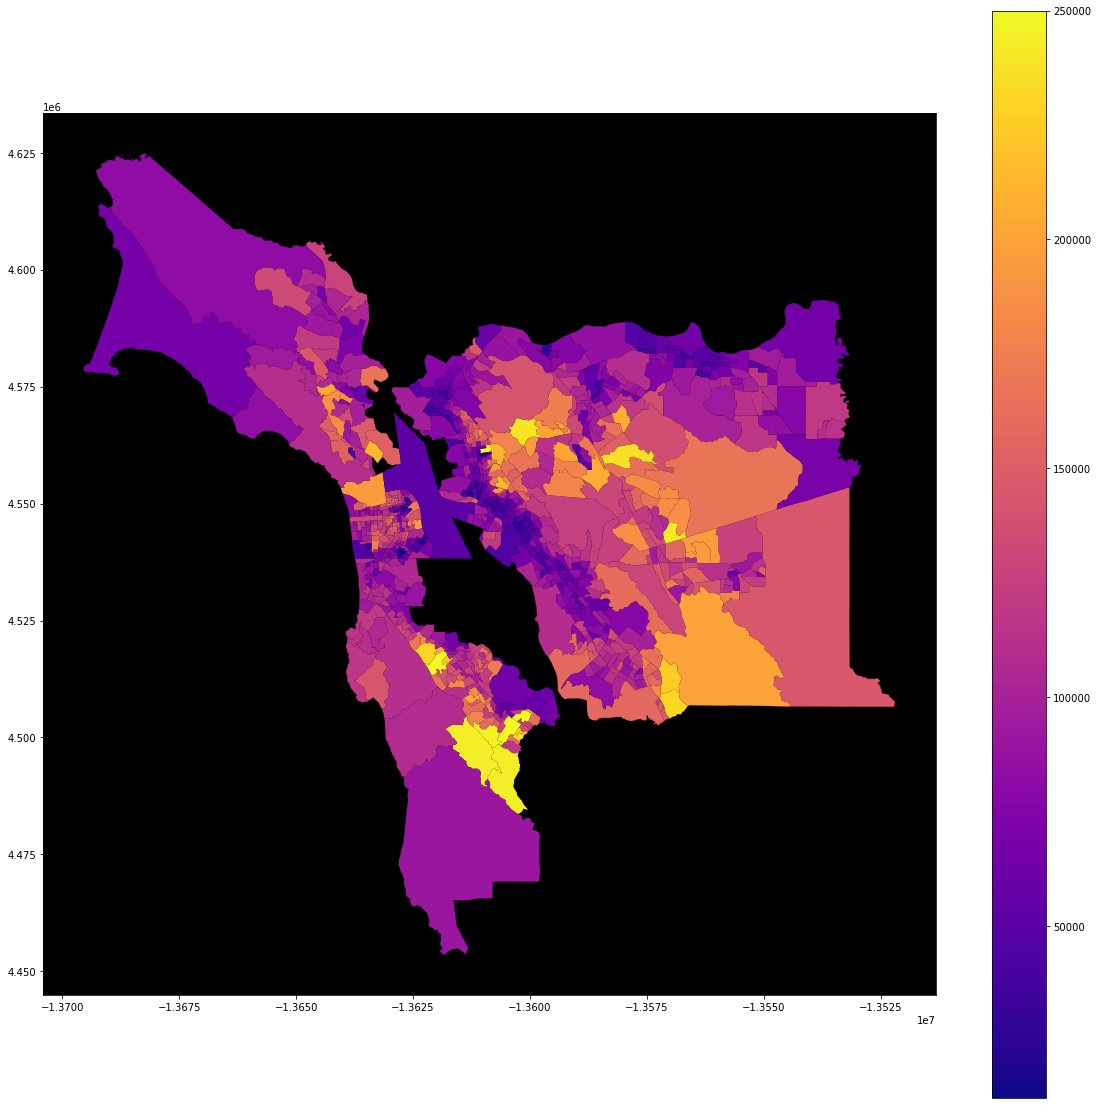

In [10]:
f, ax = plt.subplots(1,1,figsize=(20,20))
sf_msa.dropna(subset=['B19013_001E'], axis=0).plot('B19013_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

In [122]:
ca = products.ACS(2019).from_state('California',level='county',
                                        variables=['B19013_001E'])

/Users/marta/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


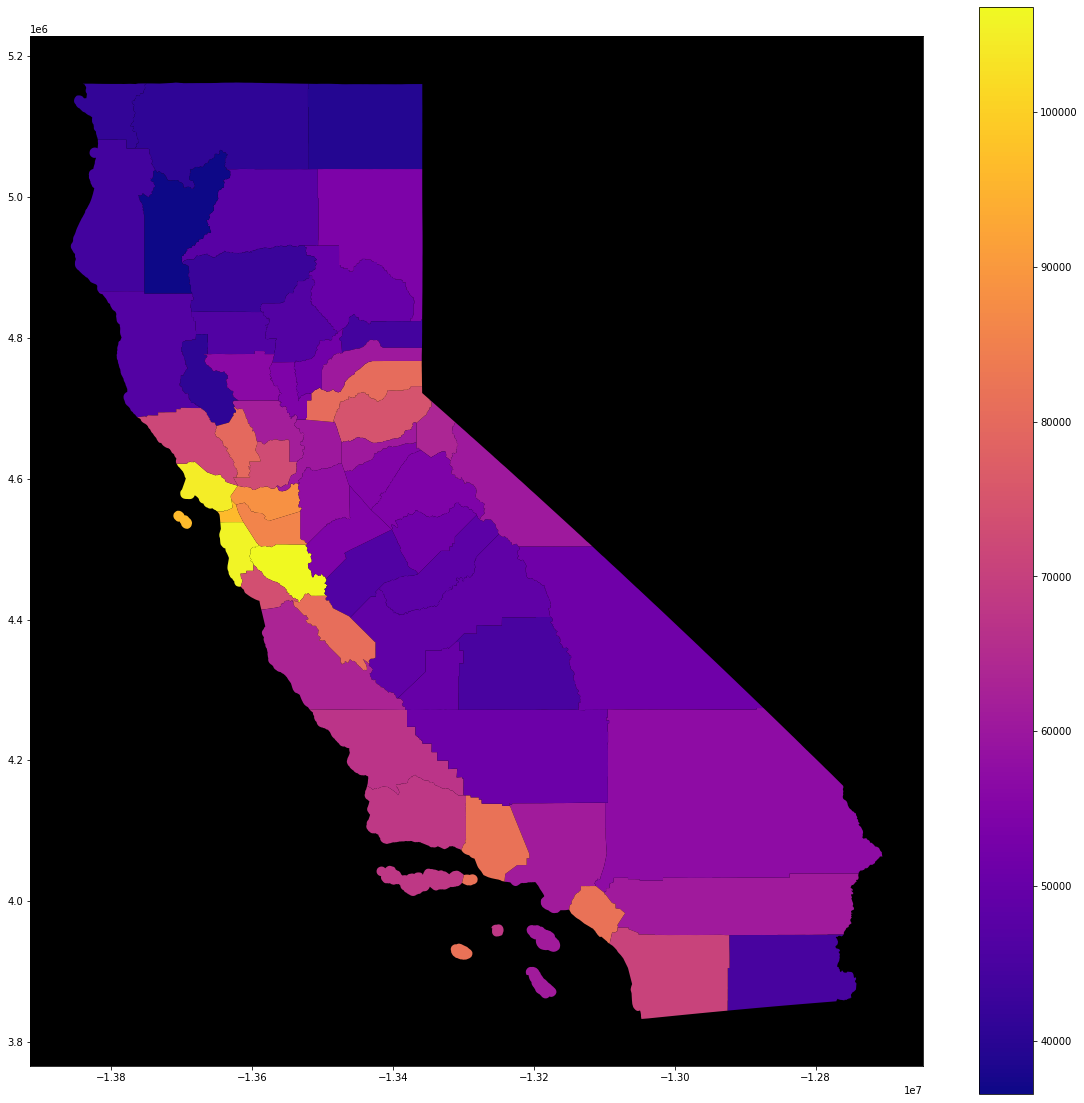

In [123]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ca.dropna(subset=['B19013_001E'], axis=0).plot('B19013_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

### Median household income: B19013_001E
### Median Contract Rent: B25058_001E
### Households with food stamp: B19058_002E 
### Households food stamp Estimate Total: B19058_001E

In [51]:
#Census designated places:https://en.wikipedia.org/wiki/Census-designated_place
#city town or village, example in CA https://www.california-demographics.com/cities_by_population
berkeley = products.ACS(2019).from_place('Berkeley, CA',level='tract',
                                        variables=['B19013_001E','B25058_001E','B19058_002E','B19058_001E'])

Matched: Berkeley, CA to Berkeley city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/var/folders/6f/phk5mdmd46z3r251brl5bj440000gn/T/ipykernel_3749/1251727201.py:3: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  berkeley = products.ACS(2019).from_place('Berkeley, CA',level='tract',


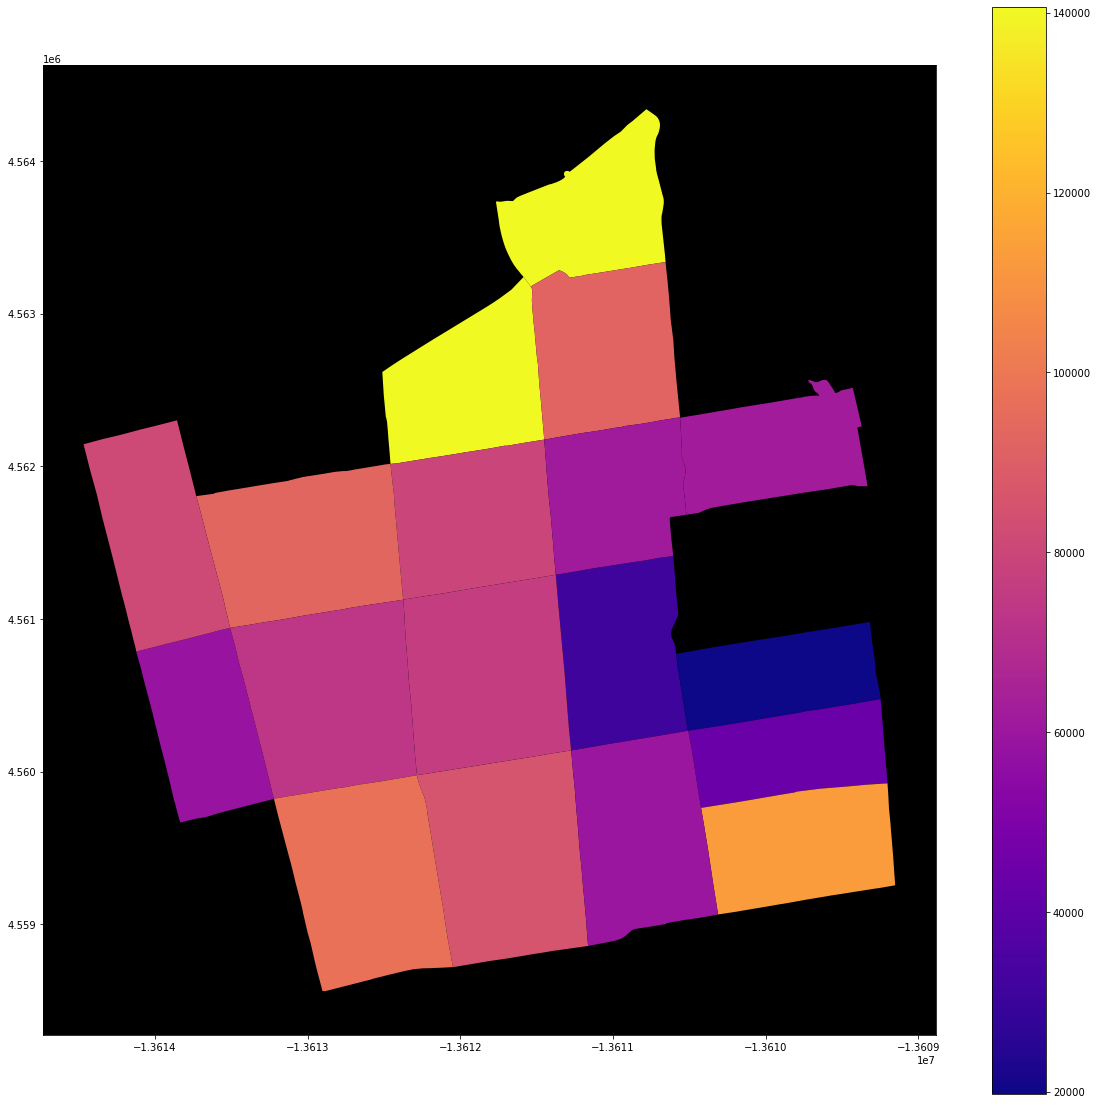

In [52]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley.dropna(subset=['B19013_001E'], axis=0).plot('B19013_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

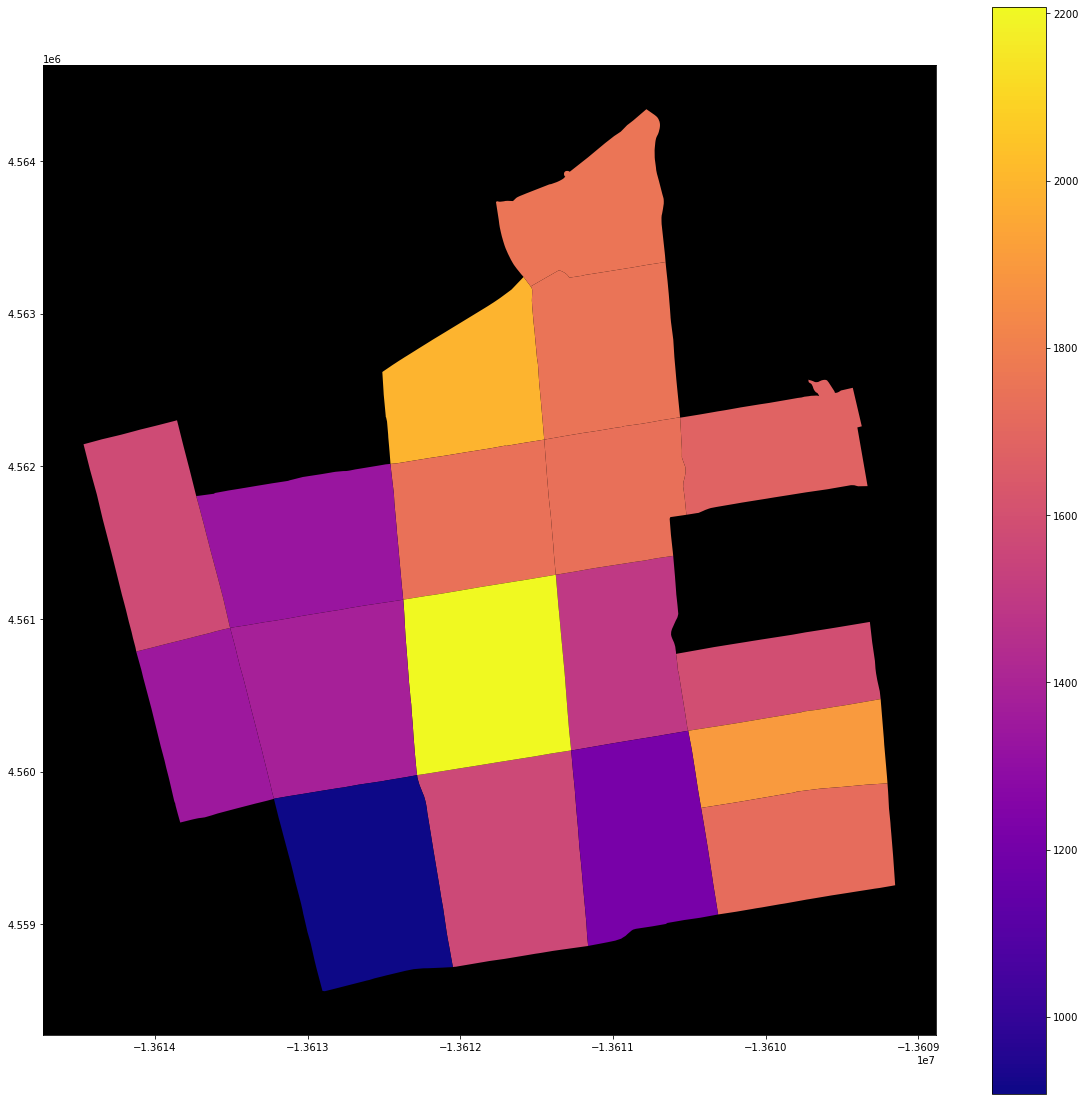

In [54]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley.dropna(subset=['B25058_001E'], axis=0).plot('B25058_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

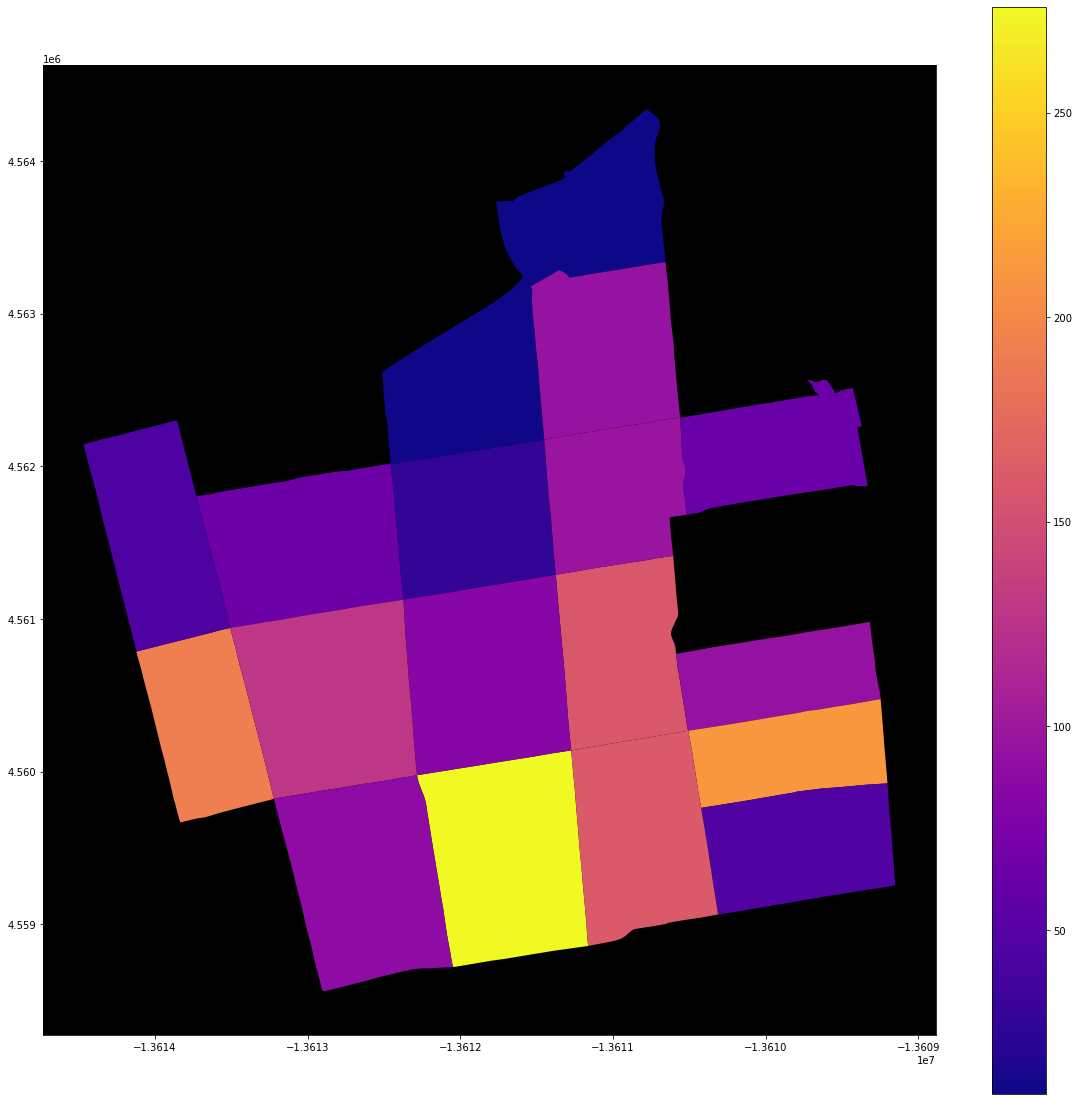

In [48]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley.dropna(subset=['B19058_002E'], axis=0).plot('B19058_002E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

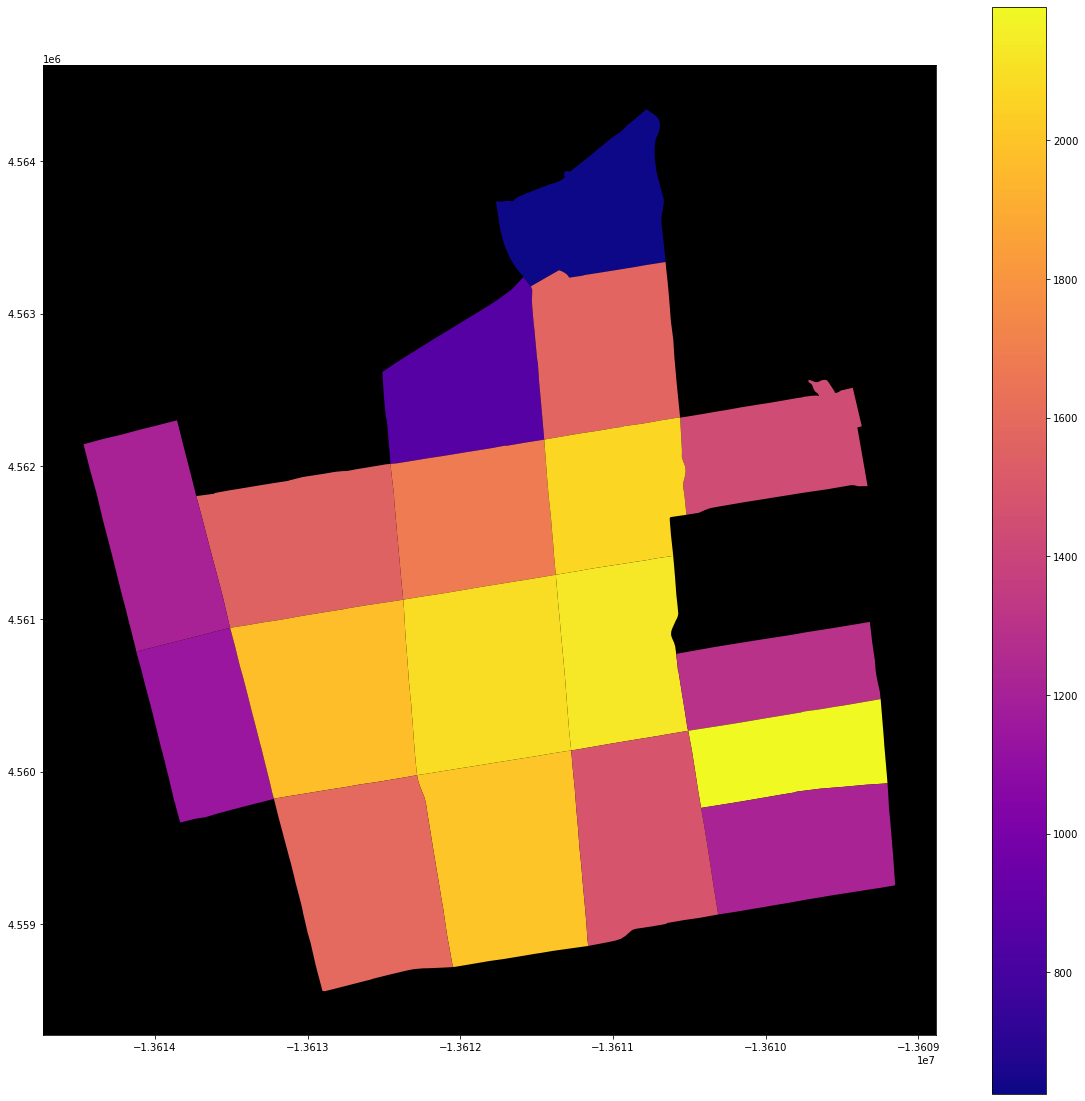

In [55]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley.dropna(subset=['B19058_001E'], axis=0).plot('B19058_001E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

In [113]:
berkeley.head()

,GEOID,geometry,B19013_001E,B19058_001E,B25056_001E,state,county,tract
0,06001423100,"POLYGON ((-13613508.330 4560942.320, -13613500...",67786.0,1966.0,1256.0,06,001,423100
1,06001422800,"POLYGON ((-13610587.750 4560771.980, -13610574...",16511.0,1386.0,1352.0,06,001,422800
2,06001423200,"POLYGON ((-13614123.370 4560786.500, -13614113...",45338.0,1094.0,775.0,06,001,423200
3,06001423300,"POLYGON ((-13613221.680 4559823.010, -13613213...",86738.0,1641.0,766.0,06,001,423300
4,06001422300,"POLYGON ((-13612458.250 4562016.630, -13612437...",64458.0,1741.0,1184.0,06,001,422300


## B23025_005E: Unemployed / table B23025: In Labor Force

In [14]:
berkeley_unemp = products.ACS(2017).from_place('Berkeley',level='tract', variables=['B23025_005E'])   

/Users/marta/opt/anaconda3/lib/python3.7/site-packages/cenpy/products.py:799: UserWarning: Uncertain place identifier "Berkeley". The place identifier should look something like "placename, state" or, for larger areas, like Combined Statistical Areas or Metropolitan Statistical Areas,"placename1-placename2, state1-state2-state3"
  replace_missing=replace_missing,
/Users/marta/opt/anaconda3/lib/python3.7/site-packages/cenpy/products.py:996: UserWarning: Cannot disambiguate placename Berkeley. Picking the shortest, best matched placename, Berkeley city, from Berkeley city, Berkeley city
  matchtarget, ixmax_row.target, ", ".join(double_winners.target.tolist())
/Users/marta/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-i

Matched: Berkeley to Berkeley city within layer Incorporated Places


In [16]:
berkeley_unemp.head()

,GEOID,geometry,B23025_005E,state,county,tract
0,06001423100,"POLYGON ((-13613508.330 4560942.320, -13613500...",105.0,06,001,423100
1,06001422800,"POLYGON ((-13610587.750 4560771.980, -13610574...",540.0,06,001,422800
2,06001423200,"POLYGON ((-13614123.370 4560786.500, -13614113...",149.0,06,001,423200
3,06001423300,"POLYGON ((-13613221.680 4559823.010, -13613213...",219.0,06,001,423300
4,06001422300,"POLYGON ((-13612458.250 4562016.630, -13612437...",134.0,06,001,422300


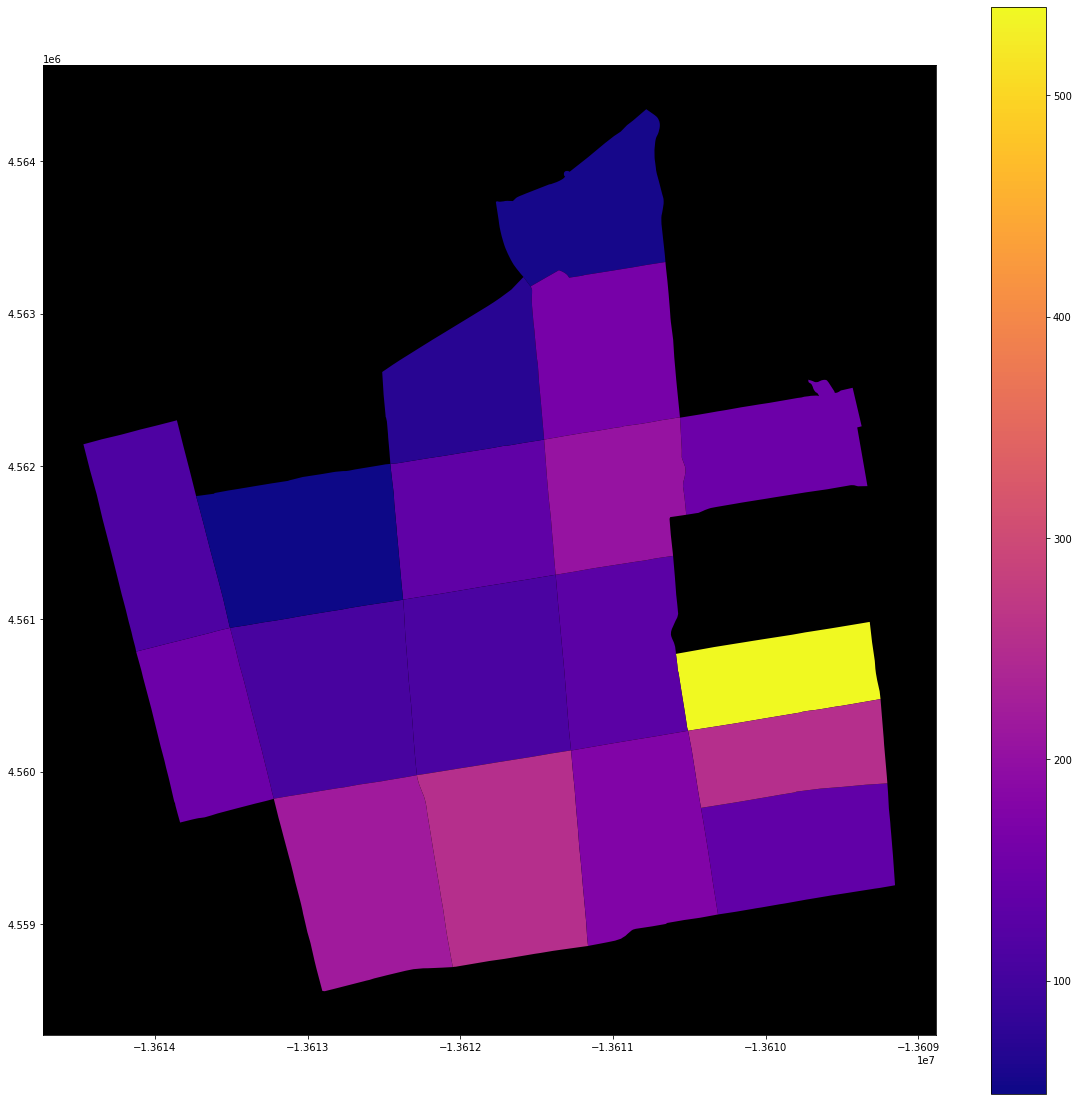

In [17]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley_unemp.dropna(subset=['B23025_005E'], axis=0).plot('B23025_005E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

In [ ]:
f, ax = plt.subplots(1,1,figsize=(20,20))
berkeley_unemp.dropna(subset=['B23025_005E'], axis=0).plot('B23025_005E', ax=ax, cmap='plasma',legend=True)
ax.set_facecolor('k')

Install it the prerelease candidate using:

```
pip install --pre cenpy
```

Code source at: [https://github.com/cenpy-devs/cenpy](https://github.com/cenpy-devs/cenpy)! I'll also maintain a roadmap [here](https://github.com/cenpy-devs/cenpy/milestones).

# Cenpy 1.0.0 API Documentation

source: https://cenpy-devs.github.io/cenpy/#
Cenpy started as an interface to explore and query the US Census API and return Pandas Dataframes. This was mainly intended as a wrapper over the basic functionality provided by the census bureau. I was initially inspired by `acs.R` in its functionality and structure. In addition to `cenpy`, a few other census packages exist out there in the Python ecosystem, such as:

- [datamade/census](https://github.com/datamade/census) - "a python wrapper for the US Census API"
- [jtleider/censusdata](https://github.com/jtleider/censusdata) - "download data from Census API"

Others use `requests` raw on the Census API to extract the data they want. 

Most packages (including `cenpy` itself) involved a very stilted/specific API query due to the way the census API worked. Basically, it's difficult to construct an efficiently query against the census API without knowing the so-called "geographic hierarchy" in which your query fell: 

![The Census Hierarchy](https://raw.githubusercontent.com/cenpy-devs/cenpy/master/img/census_hierarchy.png)

The main census API does not allow a user to leave middle levels of the hierarchy vague: For you to get a collection of census tracts in a state, you need to query for all the *counties* in that state, then express your query about tracts in terms of a query about all the tracts in those counties. Even `tidycensus` in `R` [requires this in many common cases](https://walkerke.github.io/tidycensus/articles/basic-usage.html#geography-in-tidycensus). 

Say, to ask for all the blocks in Arizona, you'd need to send a few separate queries:
```
what are the counties in Arizona?
what are the tracts in all of these counties?
what are the blocks in all of these tracts in all of these counties?
```
This was necessary because of the way the hierarchy diagram (shown above) is structured. Blocks don't have a unique identifier outside of their own tract; if you ask for block `001010`, there might be a bunch of blocks around the country that match that identifier. Sometimes, this meant conducting a very large number of repetitive queries, since the packages are trying to build out a correct search tree hierarchy. This style of [tree search](https://en.wikipedia.org/wiki/Breadth-first_search) is relatively slow, especially when conducting this search over the internet...

So, if we focus on the geo-in-geo style queries using the hierarchy above, we're in a tough spot if we want to *also* make the API easy for humans to use. 

# Enter Geographies

Fortunately for us, a *geographic information system* can figure out these kinds of nesting relationships without having to know each of the levels above or below. This lets us use very natural query types, like:
```
what are the blocks *within* Arizona?
```
There is a *geographic information system* that `cenpy` had access to, called the Tiger Web Mapping Service. These are ESRI Mapservices that allow for a fairly complex set of queries to extract information. But, in general, neither [`census`](https://github.com/datamade/census/pull/33) nor `censusdata` used the TIGER web map service API. Cenpy's `cenpy.tiger` was a [fully-featured wrapper around the ESRI Mapservice](https://nbviewer.jupyter.org/gist/dfolch/2440ba28c2ddf5192ad7#5.-Pull-down-the-geometry), but was mainly *not* used by the package itself to solve this tricky problem of building many queries to solve the `geo-in-geo` problem. 

Instead, `cenpy1.0.0` uses the TIGER Web mapping service to intelligently get *all* the required geographies, and then queries for those geographies in a very parsimonious way. This means that, instead of tying our user interface to the census's datastructures, we can have some much more natural place-based query styles. 

# For instance

Let's grab all the tracts in Los Angeles. And, let's get the Race table, `P004`. 

The new `cenpy` API revolves around *products*, which integrate the geographic and the data APIs together. For starters, we'll use the 2010 Decennial API: 
variables: https://api.census.gov/data/2010/dec/sf1/variables.html

In [25]:
dectest = products.Decennial2010()

Now, since we don't need to worry about entering geo-in-geo structures for our queries, we can request race data for all the tracts in Los Angeles County using the following method:

In [26]:
la = dectest.from_county('Los Angeles, CA', 
                          level='tract', 
                          variables=['^P004'])

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:600: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


And, making a pretty plot of the Hispanic population in LA:

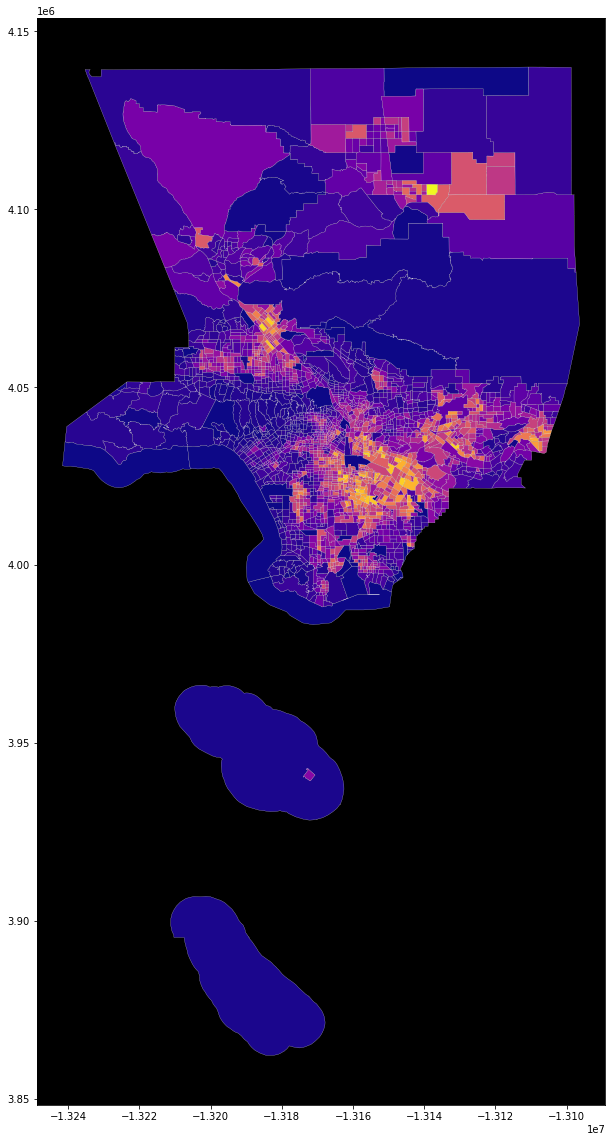

In [28]:
f,ax = plt.subplots(1,1,figsize=(20,20))
la.plot('P004003', edgecolor='white', cmap='plasma', ax=ax, linewidth=.2)
ax.set_facecolor('k')

How this *works* from a software perspective is a significant imporvement on how the other packages, like `cenpy` itself, work.
1. Take the name the user provided and find a match `target` within a level of the census geography. *(e.g. match Los Angeles, CA to Los Angeles County)*
2. **Using the Web Mapping Service,** find all the tracts that fall within our `target`.
3. **Using the data API,** query for all the data about those tracts that are requested.

Since the Web Mapping Service provides us all the information needed to build a complete geo-in-geo query, we don't need to use repeated queries. Further, since we are using *spatial querying* to do the heavy lifting, there's no need for the user to specify a detailed geo-in-geo hierarchy: using the [Census GIS](https://tigerweb.geo.census.gov/tigerwebmain/tigerweb_restmapservice.html), we can build the hierarchy for free. 

Or, for example, a case that's difficult to deal with: census geographies that span two states. Let's just grab all the tracts in the Kansas City consolidated statistical area, regardless of which state they fall into:

In [29]:
ks = dectest.from_csa('Kansas City', level='tract', variables=['P001001'])

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:593: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


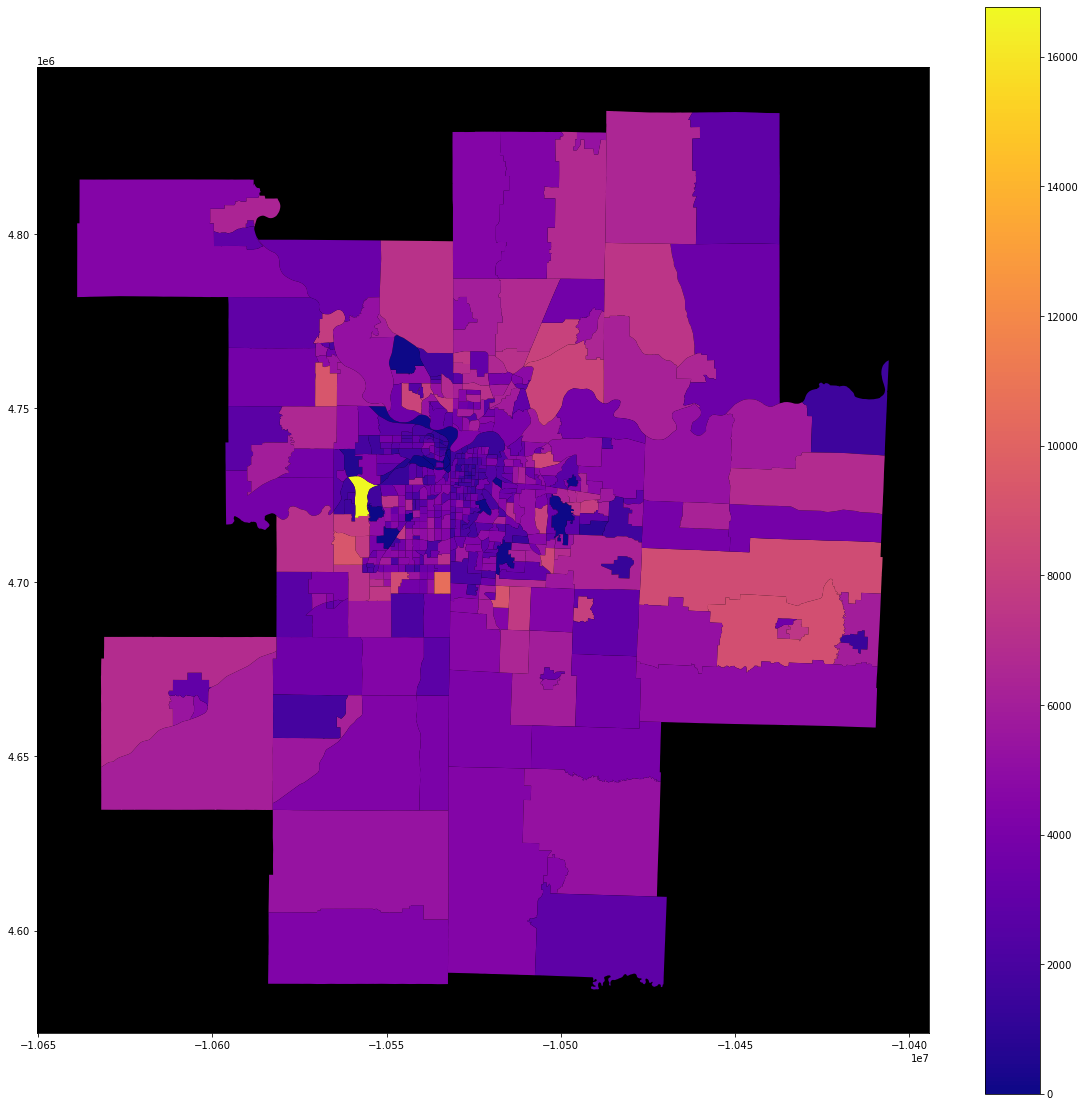

In [30]:
##Total Population
f,ax = plt.subplots(1,1,figsize=(20,20))
ks.plot('P001001', ax=ax, cmap='plasma', linewidth=0,legend=True)
ax.set_facecolor('k')

## A bit of the weeds

Thus, now `cenpy` has a very simple interface to grab just the data you want and get out of your way. But, there are a few additional helper functions to make it simple to work with data. 

For instance, it's possible to extract the boundary of the *target* boundary using the `return_bounds` argument:

In [31]:
ma, ma_bounds = dectest.from_state('Massachusetts', 
                                   return_bounds=True)

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:605: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(state, variables, level, "States", **kwargs)


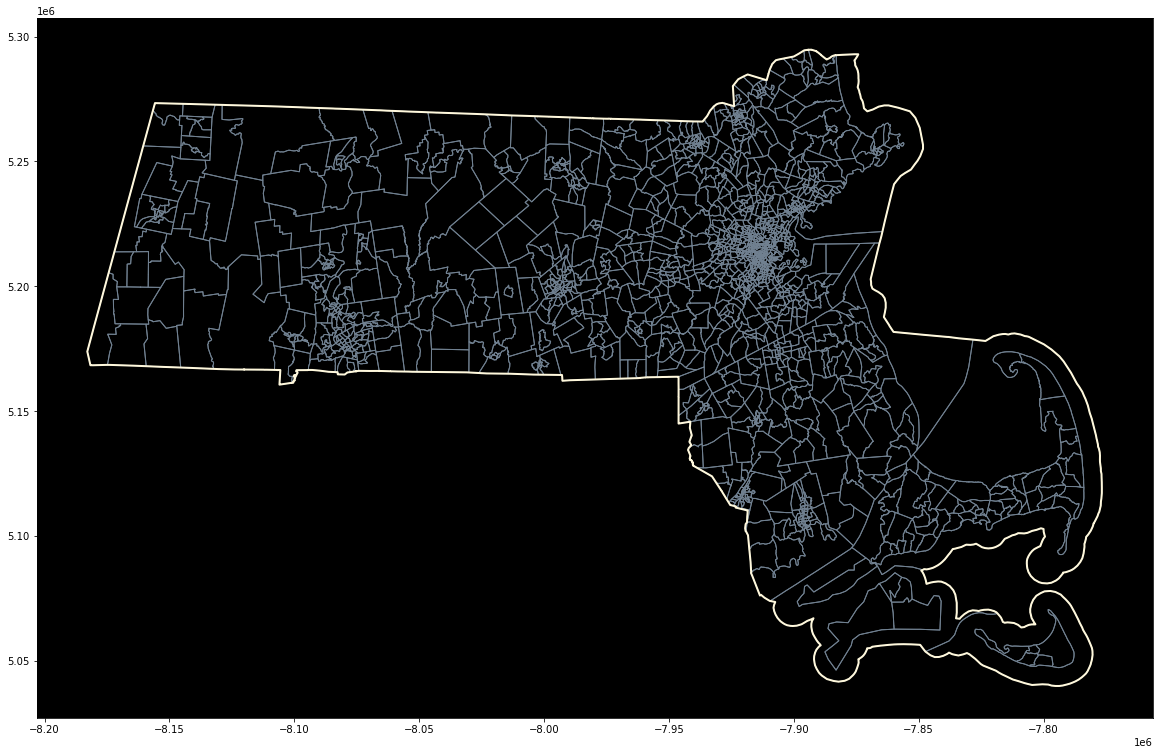

In [32]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ma.plot(edgecolor='slategrey', color='none', ax=ax)
ma_bounds.plot(edgecolor='cornsilk', color='none', ax=ax, linewidth=2)
ax.set_facecolor('k')

And, because some kinds of census geometries do not nest neatly within one another, it's possible to request that the "within" part of the geo-in-geo operation is relaxed to only consider geometries that *intersect* with the requested place:

In [33]:
tuc, tuc_bounds = dectest.from_place('Tucson, AZ', 
                                     level='tract',
                                     return_bounds=True, strict_within=False)

Matched: Tucson, AZ to Tucson city within layer Incorporated Places


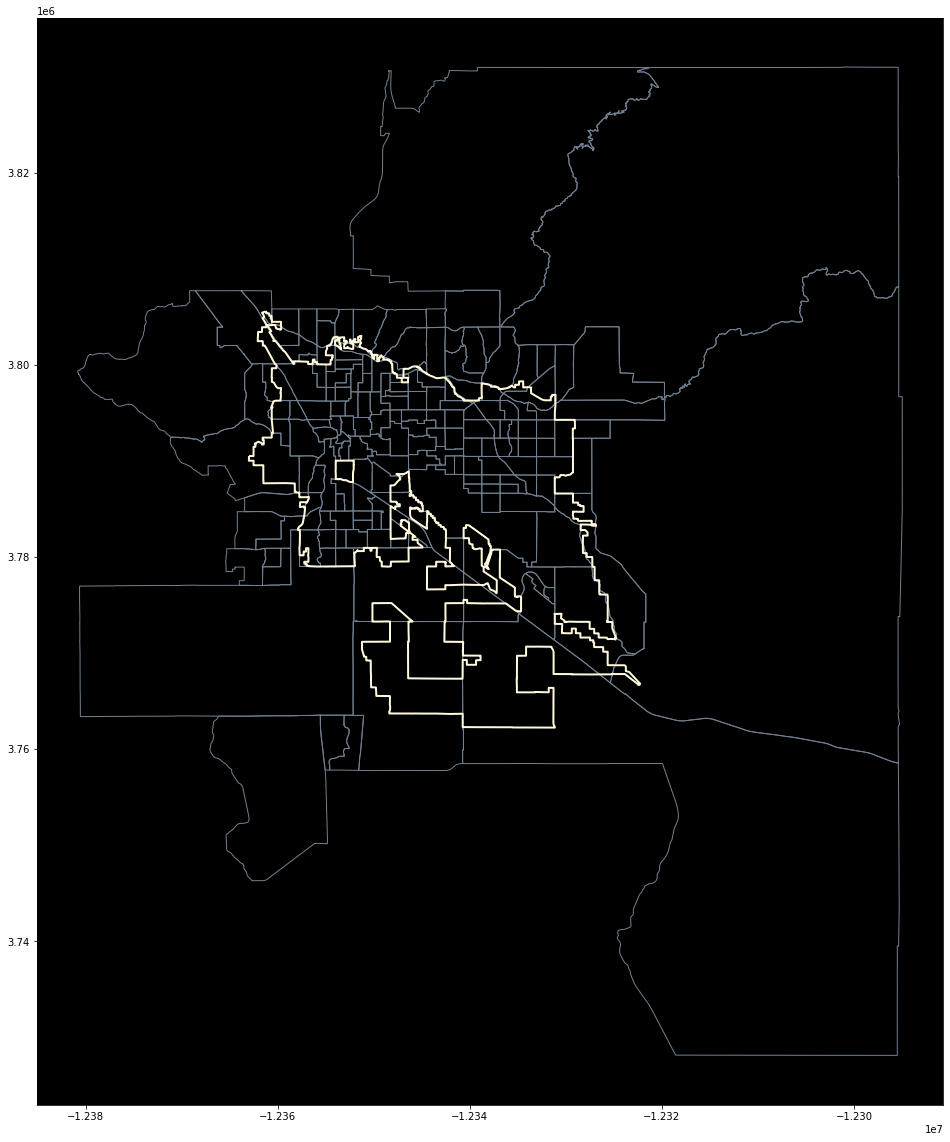

In [35]:
f, ax = plt.subplots(1,1,figsize=(20,20))
tuc.plot(edgecolor='slategrey', color='none', ax=ax)
tuc_bounds.plot(edgecolor='cornsilk', color='none', ax=ax, linewidth=2)
ax.set_facecolor('k')

# Additional Products

This works for all of the ACSs that are supported by the Web Mapping Service. This means that `cenpy` supports this place-based API for the results from 2013 to 2017:

In [37]:
for year in range(2017, 2019):
    print(year)
    acs = products.ACS(year=year)
    acs.from_place('Tucson, AZ')

2017
Matched: Tucson, AZ to Tucson city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/var/folders/6f/phk5mdmd46z3r251brl5bj440000gn/T/ipykernel_3749/3150652249.py:4: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  acs.from_place('Tucson, AZ')


2018
Matched: Tucson, AZ to Tucson city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/var/folders/6f/phk5mdmd46z3r251brl5bj440000gn/T/ipykernel_3749/3150652249.py:4: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  acs.from_place('Tucson, AZ')


And it has the same general structure as we saw before:

In [39]:
sf = products.ACS(2017).from_place('San Francisco, CA', level='tract',     
                                   variables=['B00002*', 'B01002H_001E']) # B01002H_001E Estimate!!Median age --!!Total:

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


Matched: San Francisco, CA to San Francisco city within layer Incorporated Places


/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/var/folders/6f/phk5mdmd46z3r251brl5bj440000gn/T/ipykernel_3749/2925347269.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  sf = products.ACS(2017).from_place('San Francisco, CA', level='tract',


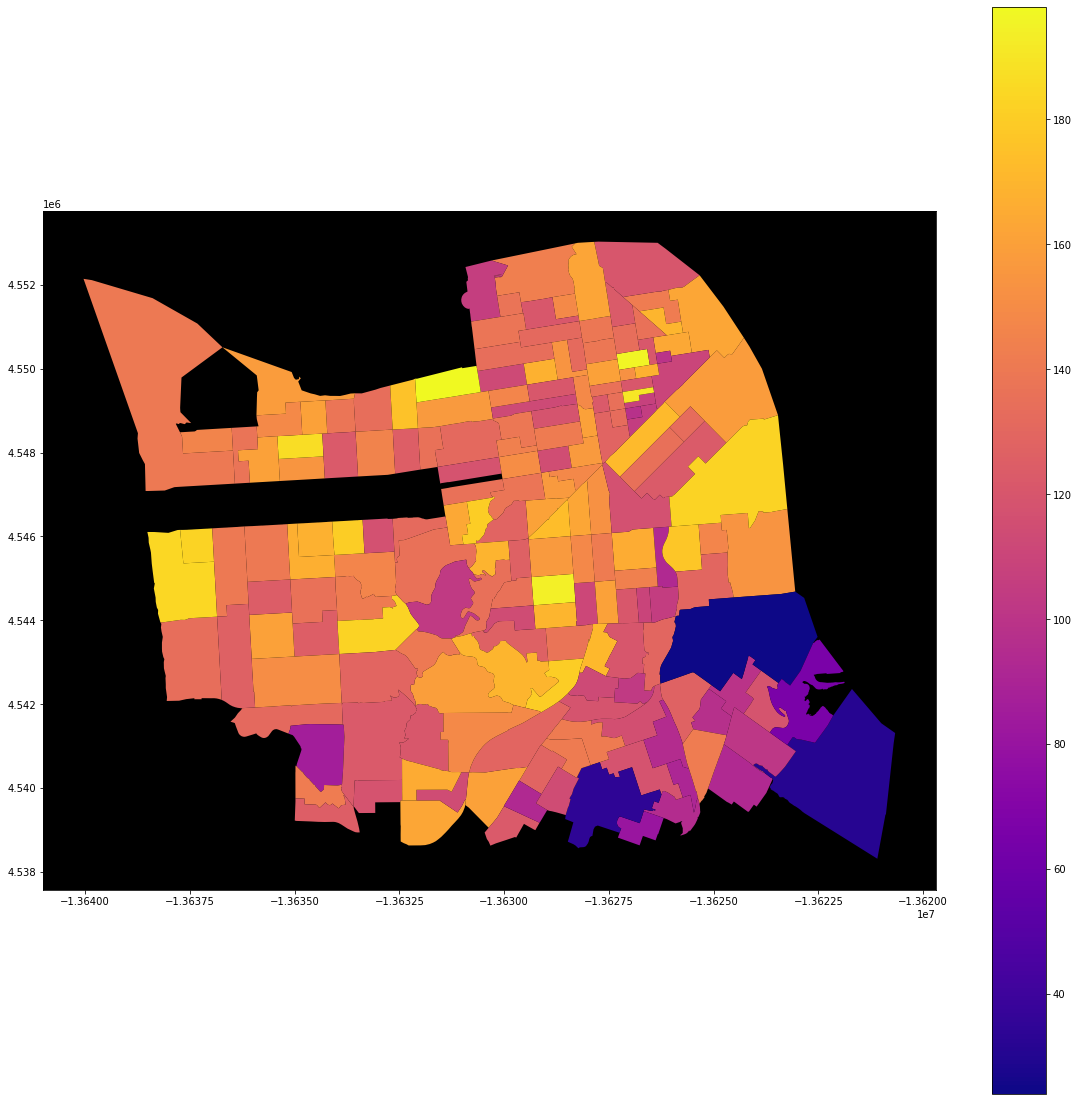

In [44]:
f,ax = plt.subplots(1,1,figsize=(20,20))  ###B00002_001E total housing units
sf.dropna(subset=['B00002_001E']).plot('B00002_001E', cmap='plasma', linewidth=0, ax=ax,legend=True)
ax.set_facecolor('k')

# Happy hacking!

To install this version of cenpy, grab the *release candidate*:

```
pip install --pre cenpy
```

File bugs, rough edges, things you want me to know about, and interesting behavior at [https://github.com/ljwolf/cenpy](https://github.com/ljwolf/cenpy)!